In [7]:
%matplotlib inline
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data",
                   header=None, sep=' ')
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
7,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN
9,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,NaN


In [4]:
handwritten_digits = data.loc[:, 0 : 255]
result_digits = data.loc[:, 256 : 266].apply(lambda row: row.idxmax() % 256, axis=1)

[1]


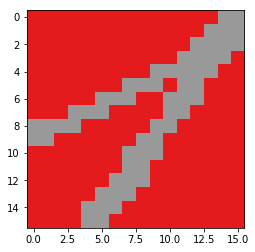

In [8]:
i = np.random.randint(0, len(handwritten_digits), 1)
print(result_digits.loc[i].values)
plt.imshow(handwritten_digits.loc[i].values.reshape((16,16)), cmap = "Set1")
plt.show()

In [96]:
hw_train, hw_test, res_train, res_test = train_test_split(handwritten_digits, result_digits, \
                                                          test_size=0.3, random_state=53)
knn_cl = KNeighborsClassifier()
knn_cl.fit(hw_train, res_train)
res_test_pred = knn_cl.predict(hw_test)

In [97]:
metrics.accuracy_score(res_test, res_test_pred)

0.899581589958159

In [98]:
print(metrics.classification_report(res_test, res_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        42
           1       0.74      1.00      0.85        39
           2       0.90      0.96      0.93        56
           3       0.83      0.96      0.89        51
           4       1.00      0.92      0.96        50
           5       0.86      0.89      0.88        47
           6       0.93      0.93      0.93        45
           7       0.95      0.86      0.90        44
           8       0.98      0.75      0.85        53
           9       0.97      0.75      0.84        51

   micro avg       0.90      0.90      0.90       478
   macro avg       0.91      0.90      0.90       478
weighted avg       0.91      0.90      0.90       478



In [110]:
knn_params = {'n_neighbors': range(6, 9), 
              'weights': ["uniform", "distance"], 
              'metric': ['euclidean', "rogerstanimoto", "russellrao"]}
knn_grid = GridSearchCV(knn_cl, knn_params, cv=10, scoring='accuracy')
knn_grid.fit(hw_train, res_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(6, 9), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'rogerstanimoto', 'russellrao']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [111]:
knn_grid.best_params_

{'metric': 'rogerstanimoto', 'n_neighbors': 7, 'weights': 'distance'}

In [112]:
knn_grid.best_score_

0.9013452914798207

In [113]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='rogerstanimoto',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

In [114]:
knn_best_param = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='rogerstanimoto',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')
knn_best_param.fit(hw_train, res_train)
res_test_best = knn_best_param.predict(hw_test)

In [115]:
metrics.accuracy_score(res_test, res_test_best)

0.9100418410041841

In [116]:
print(metrics.classification_report(res_test, res_test_best))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.74      1.00      0.85        39
           2       0.92      0.96      0.94        56
           3       0.84      0.96      0.90        51
           4       1.00      0.88      0.94        50
           5       0.90      0.94      0.92        47
           6       0.96      0.96      0.96        45
           7       0.95      0.89      0.92        44
           8       0.95      0.79      0.87        53
           9       0.95      0.78      0.86        51

   micro avg       0.91      0.91      0.91       478
   macro avg       0.92      0.91      0.91       478
weighted avg       0.92      0.91      0.91       478

